<a href="https://colab.research.google.com/github/architbatham/Machine-Learning-Dry-Beans-Classification-/blob/main/drybeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import operator
import csv
import matplotlib.pyplot as plt
from sklearn import linear_model



# **KNN**

In [ ]:
df = pd.read_csv('beans.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
#print ("Target Name:")
f_name=('Area',	'Perimeter',	'MajorAxisLength',	'MinorAxisLength',	'AspectRation','Eccentricity',
              'ConvexArea',	'EquivDiameter',	'Solidity',	'roundness',	'Compactness',	'ShapeFactor1',	
              'ShapeFactor2',	'ShapeFactor3',	'ShapeFactor4')
print(f_name);
target=["Hand"];
print(target);

('Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4')
['Hand']


In [ ]:
#feature=np.df.to_numpy()
df1=df.iloc[:,0:10];
df2=df.iloc[:,[-1]];
print(df1);
print(df2);

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  
0          0.549812       2871

# Traning and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df2,random_state = 0);

In [ ]:
print("X_train shape:{}".format(X_train.shape))
print("X_test shape:{}".format(X_test.shape))

X_train shape:(10208, 10)
X_test shape:(3403, 10)


In [ ]:
print("Y_train shape:{}".format(y_train.shape))
print("Y_test shape:{}".format(y_test.shape))

Y_train shape:(10208, 1)
Y_test shape:(3403, 1)


In [ ]:
print(X_train);
print(X_test);

         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
11550   30848    647.564       241.474352       163.192041      1.479694   
4484    72058   1035.943       397.717024       233.410215      1.703940   
3660   177713   1616.237       601.276120       379.392221      1.584840   
7065    60121    964.754       399.893784       192.674343      2.075491   
10075   21405    534.918       191.202913       143.021557      1.336882   
...       ...        ...              ...              ...           ...   
13123   37832    720.476       263.034496       183.384981      1.434330   
3264    85890   1152.016       417.536420       262.719645      1.589285   
9845    51131    842.796       316.185621       207.028992      1.527253   
10799   27884    630.303       239.405409       148.484842      1.612322   
2732    70344   1037.985       378.651095       237.909773      1.591574   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  
11550      0.73707

In [ ]:
x_col=df.columns[0:10]
print(x_col)
x_col=x_col.tolist()
print(x_col)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity'],
      dtype='object')
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity']


In [ ]:
print(y_train)
Y_train=np.array(y_train)
Y_train=np.reshape(Y_train,100)
print(Y_train)
print(type(Y_train))



          Class
11550  DERMASON
4484       CALI
3660     BOMBAY
7065      HOROZ
10075  DERMASON
...         ...
13123  DERMASON
3264   BARBUNYA
9845       SIRA
10799  DERMASON
2732   BARBUNYA

[10208 rows x 1 columns]


ValueError: ignored

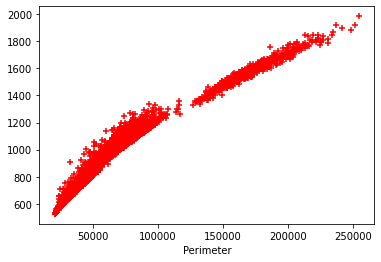

In [ ]:
import seaborn as sns
%matplotlib inline
plt.xlabel('Area')
plt.xlabel('Perimeter')
plt.scatter(df.Area,df.Perimeter,color='red', marker='+')


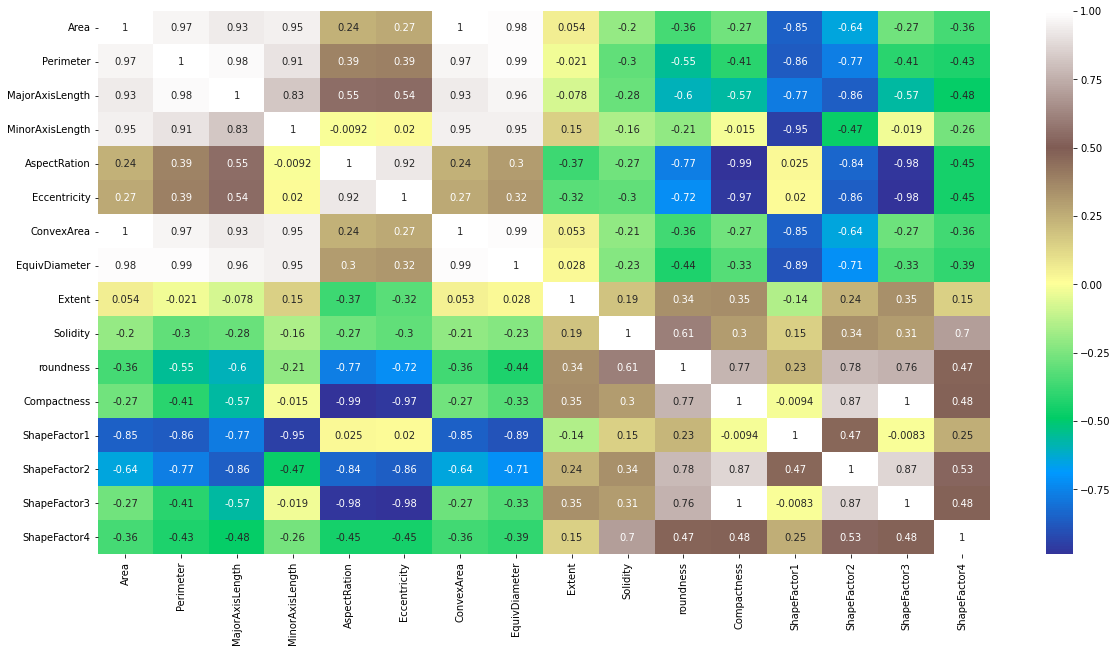

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='terrain')

## **Apply KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)

In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
classifier.score(X_test,y_test)

0.7387599177196591

In [ ]:
pred=classifier.predict(X_test)
print(pred)

['SEKER' 'DERMASON' 'SEKER' ... 'DERMASON' 'DERMASON' 'BOMBAY']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    BARBUNYA       0.46      0.48      0.47       319
      BOMBAY       1.00      0.99      1.00       111
        CALI       0.65      0.62      0.63       419
    DERMASON       0.85      0.87      0.86       905
       HOROZ       0.76      0.73      0.74       491
       SEKER       0.79      0.71      0.75       470
        SIRA       0.69      0.76      0.72       688

    accuracy                           0.74      3403
   macro avg       0.74      0.73      0.74      3403
weighted avg       0.74      0.74      0.74      3403



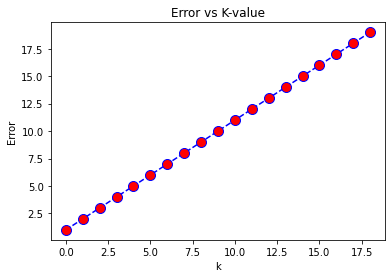

In [ ]:
plt.plot(range(1,20),color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error vs K-value')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [ ]:
classifier.score(X_test,y_test)

0.7073170731707317

In [ ]:
pred=classifier.predict(X_test)
print(pred)

['DERMASON' 'DERMASON' 'SEKER' ... 'DERMASON' 'DERMASON' 'BOMBAY']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    BARBUNYA       0.48      0.45      0.47       319
      BOMBAY       1.00      0.99      1.00       111
        CALI       0.67      0.65      0.66       419
    DERMASON       0.79      0.90      0.84       905
       HOROZ       0.67      0.61      0.64       491
       SEKER       0.75      0.53      0.62       470
        SIRA       0.66      0.76      0.71       688

    accuracy                           0.71      3403
   macro avg       0.72      0.70      0.70      3403
weighted avg       0.71      0.71      0.70      3403



# **SVM**

In [ ]:
df.shape

(13611, 17)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df2,random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("X_train shape: {}".format(X_test.shape))
print("X_train shape: {}".format(Y_train.shape))
print("X_train shape: {}".format(y_test.shape))

X_train shape: (10208, 10)
X_train shape: (3403, 10)
X_train shape: (10208, 1)
X_train shape: (3403, 1)


# Train SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
print(end='\n\n')
print(y_train)
Y_train=np.array(y_train)
print(end='\n\n')

Y_train=np.reshape(Y_train,10208)
print(Y_train)
print(type(Y_train))




          Class
11550  DERMASON
4484       CALI
3660     BOMBAY
7065      HOROZ
10075  DERMASON
...         ...
13123  DERMASON
3264   BARBUNYA
9845       SIRA
10799  DERMASON
2732   BARBUNYA

[10208 rows x 1 columns]


['DERMASON' 'CALI' 'BOMBAY' ... 'SIRA' 'DERMASON' 'BARBUNYA']
<class 'numpy.ndarray'>


In [ ]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
classification_rbf.score(X_test,y_test)

0.6394357919482809

# SVC with Kernal Polynomial

In [ ]:
classification_poly=SVC(kernel='rbf',degree=2)
classification_poly.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=2)

In [ ]:
classification_poly.score(X_test,y_test)

0.6394357919482809